# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [43]:
# data processing
import numpy as np
import pandas as pd
import datetime
import math
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
import plotly.express as px

# plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

# Packages for modeling
import surprise
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Packages for saving models
import pickle

# Packages for Randomisation
import random

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
#df = # load the data
train = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/train.csv')
test = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/test.csv')
tags = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/tags.csv')
movies = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/movies.csv')
links = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/links.csv')
imdb_data = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/imdb_data.csv')
genome_tags = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/genome_tags.csv')
genome_scores = pd.read_csv('C:/Users/tlotl/Documents/Ikaneng-Movie-Recommender-Predict/2207ACDS_TeamCW2/genome_scores.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing descriptive statistics and data visualisations. |

---


In [5]:
# Viewing movies dataframe
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
# Viewing train dataframe
train = train.merge(movies, on='movieId', how='inner')
train

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
10000033,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,1567628158,Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,1568558126,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,1563175258,Guys & Balls (2004),Comedy|Romance


In [7]:
# Changing date columns into the datetime format
from datetime import datetime
objtmstmp = train.timestamp[1]
objectdate = datetime.fromtimestamp(objtmstmp)
print("timestamp to date conversion.")
print("date", objectdate)
print("type of date object =", type(objectdate))

timestamp to date conversion.
date 2009-03-19 11:34:57
type of date object = <class 'datetime.datetime'>


In [8]:
# Viewing imdb_data dataframe
imdb_data

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [9]:
# Merging imdb and Movies dataframes

def combine_data(imdb_data, movies):

    df = imdb_data[['movieId', 'title_cast', 'director', 'plot_keywords']]
    df = df.merge(movies[['movieId', 'genres', 'title']],
                  on='movieId', how='inner')
    df.head()
    df['title_cast'] = df.title_cast.astype(str)
    df['plot_keywords'] = df.plot_keywords.astype(str)
    df['genres'] = df.genres.astype(str)
    df['director'] = df.director.astype(str)
    df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
    df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
    df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))
    df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
    df['genres'] = df['genres'].apply(lambda x: " ".join(x))

    return df.head()


df = combine_data(imdb_data, movies)

In [10]:
# Viewing the combined dataframe
df
# tags
# ratings.drop('timestamp', axis=1, inplace=True)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Jonathan Hensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren]",Mark Steven Johnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[Whitney Houston, Angela Bassett, Loretta Devine]",Terry McMillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[Steve Martin, Diane Keaton, Martin Short]",Albert Hackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [11]:
# Viewing Movies dataframe
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [12]:
# Viewing links dataframe
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [13]:
# Viewing gnome_tags dataframe
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [14]:
# Viewing gnome_scores dataframe
genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [15]:
# Creating ratings Dataframe for visualization
ratings = train.merge(movies, on='movieId', how='inner')
ratings.drop('timestamp', axis=1, inplace=True)

In [16]:
# Viewing ratings dataframe
ratings

,userId,movieId,rating,title_x,genres_x,title_y,genres_y
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...,...
10000033,84146,107912,3.0,"Fallen, The (2004)",Action|Drama|War,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,Formentera Lady,(no genres listed),Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,Nocturne (1946),Crime|Drama|Mystery,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,Guys & Balls (2004),Comedy|Romance,Guys & Balls (2004),Comedy|Romance


In [17]:
# ratings merger
rate = pd.DataFrame(ratings.groupby(['title_x'])[['rating']].mean())
rate['rating_counts'] = pd.DataFrame(ratings.groupby([
    'title_x'])['rating'].count())
rate['popularity'] = pd.DataFrame(ratings.groupby([
    'title_x'])['rating'].count() *
                                  ratings.groupby(['title_x'])[
                                      'rating'].mean())
rate.sort_values(by='popularity', ascending=False).head(15)

,rating,rating_counts,popularity
title_x,,,
"Shawshank Redemption, The (1994)",4.417624,32831,145035.0
Pulp Fiction (1994),4.195097,31697,132972.0
Forrest Gump (1994),4.047216,32383,131061.0
"Silence of the Lambs, The (1991)",4.144172,29444,122021.0
"Matrix, The (1999)",4.154253,29014,120531.5
Star Wars: Episode IV - A New Hope (1977),4.111811,27560,113321.5
Schindler's List (1993),4.247625,24004,101960.0
Fight Club (1999),4.227906,23536,99508.0
Star Wars: Episode V - The Empire Strikes Back (1980),4.146236,22956,95181.0


In [18]:
# Plotting a bar graph 

def feature_frequency(df, column):
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                  'count': list(), }
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
    final = pd.DataFrame(genre_dict)
    return final


genres = feature_frequency(movies, 'genres')

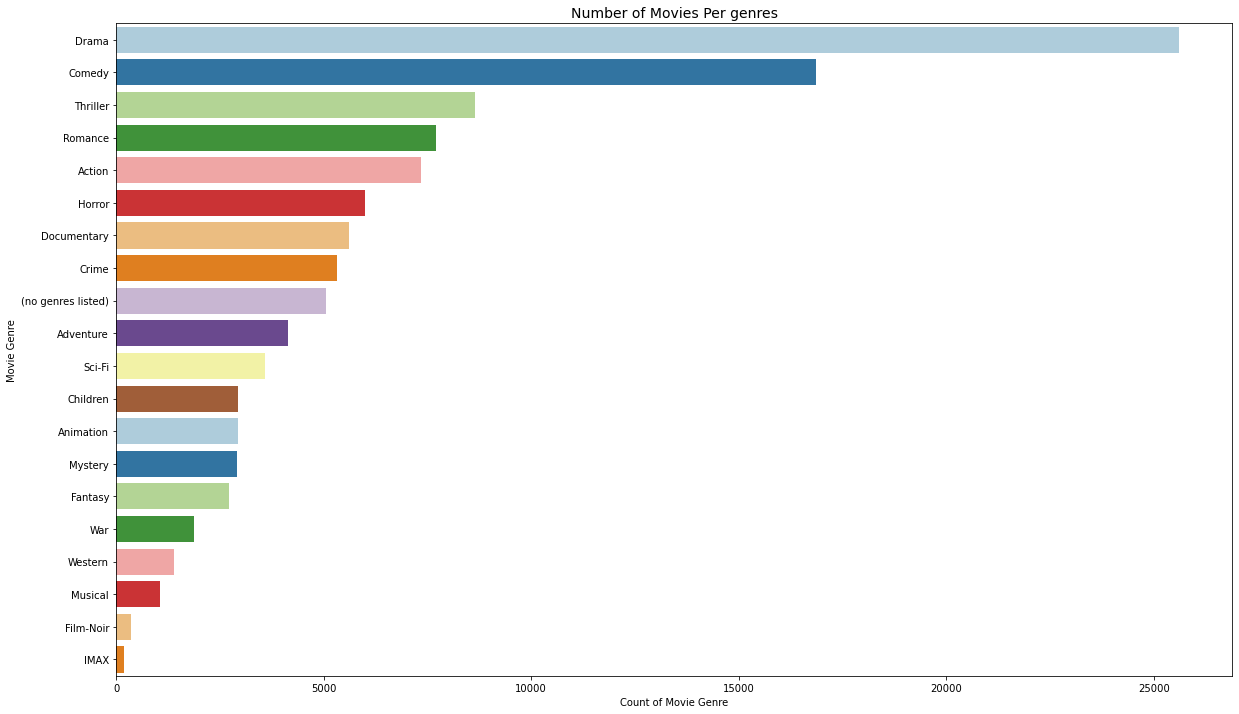

In [19]:
#Plotting the feature counts 

def feature_count(df, column):
    plt.figure(figsize=(20, 12))
    ax = sns.barplot(y=df[f'{column}'], x=df[
        'count'], palette='Paired', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel('Movie Genre')
    plt.xlabel('Count of Movie Genre')
    plt.show()


feature_count(genres.sort_values(by='count', ascending=False), 'genres')

In [20]:
# Sizing df head to keep nessesary columns 
df = imdb_data[['movieId', 'title_cast', 'director', 'plot_keywords']]
df = df.merge(movies[['movieId', 'genres', 'title']],
              on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


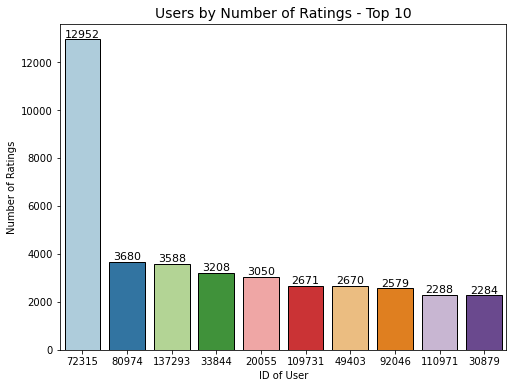

In [21]:
# Plotting the user ratings counts for the top users 
def user_ratings_count(df, n):
    plt.figure(figsize=(8, 6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x=data.index, y=data,
                     order=data.index, palette='Paired',
                     edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(),
                '%d' % int(p.get_height()),
                fontsize=11, ha='center', va='bottom')
    plt.title('Users by Number of Ratings - Top 10', fontsize=14)
    plt.xlabel('ID of User')
    plt.ylabel('Number of Ratings')

    plt.show()


user_ratings_count(train, 10)

In [23]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower()
                                                        for x in x.split()))
df['title_cast'] = df[
    'title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors'
# full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords'
# and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[['tomhanks','timallen','donrickles']]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[['robinwilliams','jonathanhyde','kirstendunst']]",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[['waltermatthau','jacklemmon','sophialoren']]",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[['whitneyhouston','angelabassett','lorettadev...",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[['stevemartin','dianekeaton','martinshort']]",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [24]:
# Extract and display the 10 most popular films in the dataset
# ratings_mean_count =
# ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
# ratings_mean_count.head(15

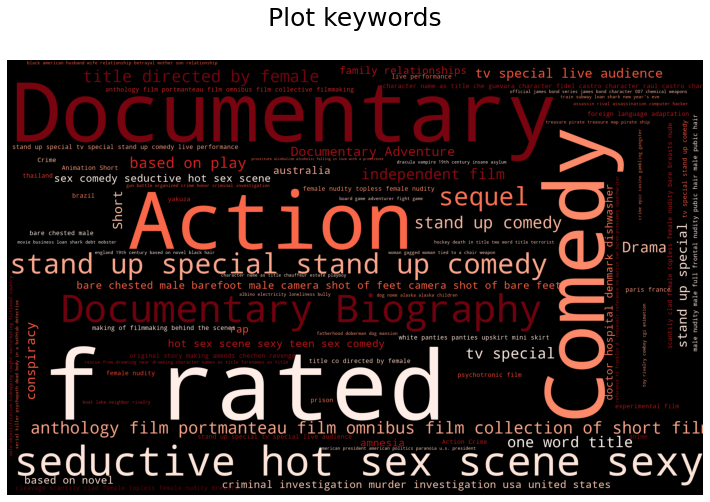

In [27]:
# Generating 
def wordcloud_generator(df, column):
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary',
              ' seefullsummary', 'seefullsummary ']

    for keyword in [keyword for keyword in df[column]
                    if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
    for word, word_freq in keyword_counts.items():
        keyword_pair.append((word, word_freq))
    keyword_pair.sort(key=lambda x: x[1], reverse=True)
    for s in keyword_pair:
        words[s[0]] = s[1]
    wordcloud = WordCloud(width=800,
                          height=500,
                          background_color='black',
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud


plot_keywords = wordcloud_generator(df, 'plot_keywords')
f = plt.figure(figsize=(20, 8))
plt.imshow(plot_keywords)
plt.axis('off')
plt.title('Plot keywords\n', fontsize=25)
plt.show()

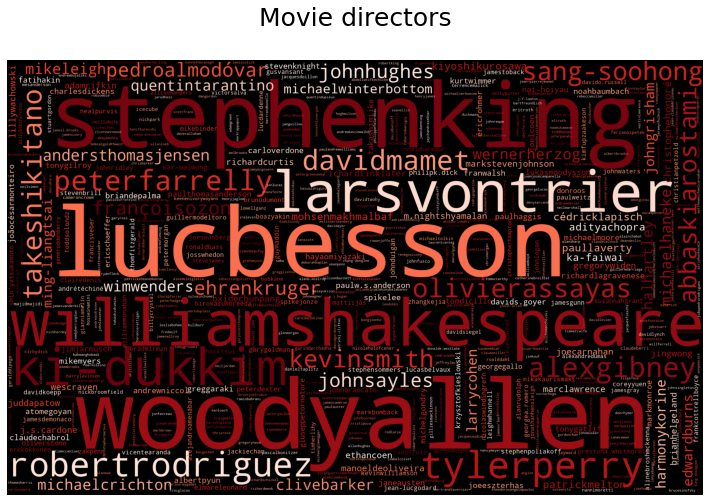

In [29]:
# Generate a WordCloud using the movie directors
directors = wordcloud_generator(df, 'director')

# Plot the WordCloud
f = plt.figure(figsize=(20, 8))
plt.imshow(directors)
plt.axis('off')
plt.title('Movie directors\n', fontsize=25)
plt.show()

In [30]:
# Count of ratings per rating
rating_df = pd.DataFrame(
    train['rating'].value_counts()).reset_index()
rating_df.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
rating_df.head(10)

,rating,count
0,4.0,2652977
1,3.0,1959759
2,5.0,1445230
3,3.5,1270642
4,4.5,880516
5,2.0,656821
6,2.5,505578
7,1.0,311213
8,1.5,159731
9,0.5,157571


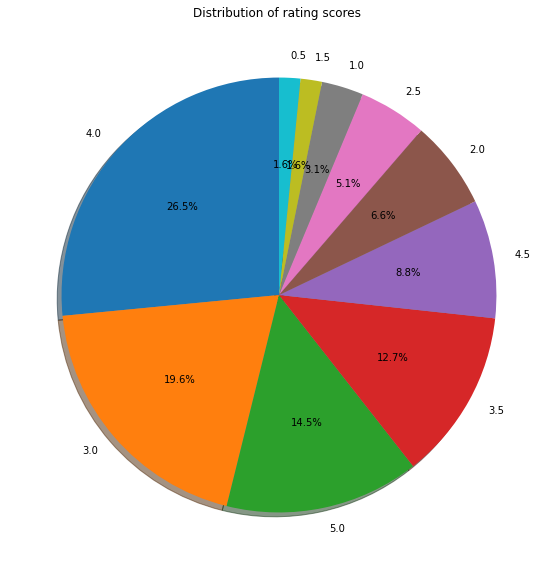

In [31]:
# Plotting the distribution of rating scores 
plt.figure(figsize=(16, 10))
sns.color_palette("crest", as_cmap=True)
values = rating_df['count']/train.shape[0]
labels = (rating_df['rating'].value_counts()/train.shape[0]).index
plt.pie(x=values, labels=labels, autopct='%1.1f%%',
        startangle=90, shadow=True)
plt.title("Distribution of rating scores ")
plt.show()

In [35]:
# Visualize ratings count
sns.color_palette("crest", as_cmap=True)
fig = px.bar(rating_df, x=rating_df['rating'],
             y=rating_df['count'],
             color=rating_df['rating'],
             title='Number of ratings')
fig.show()

genres = pd.DataFrame(movies['genres'].
                      str.split("|").
                      tolist(),
                      index=movies['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


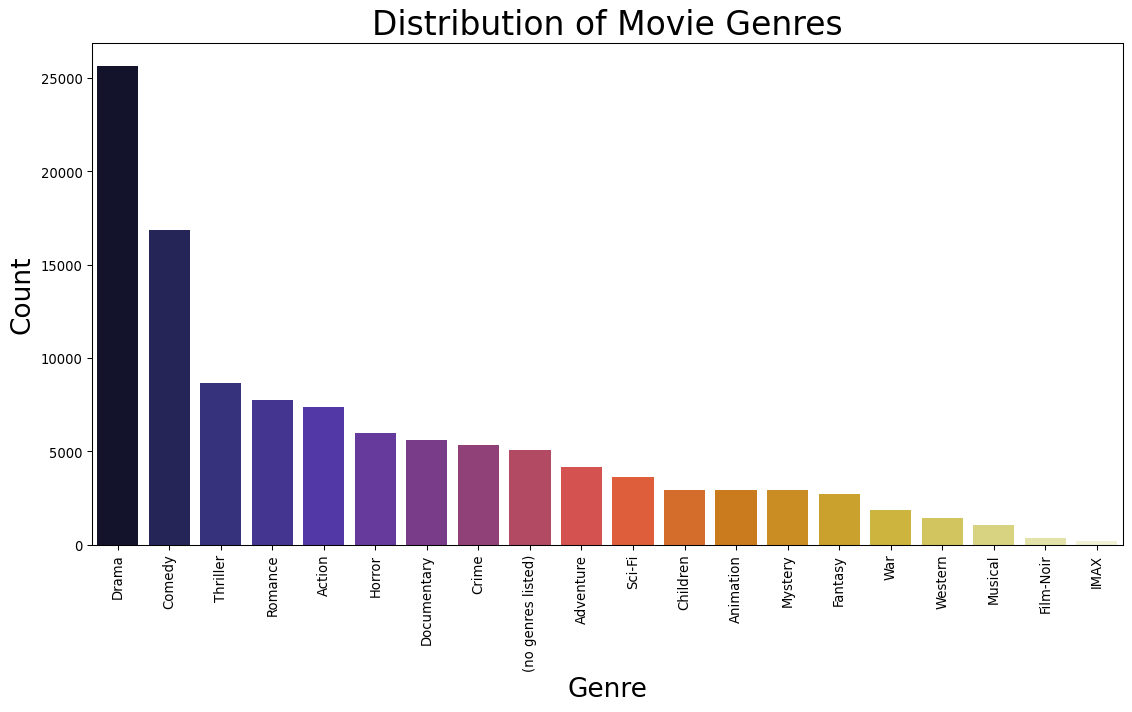

In [36]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=95)
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

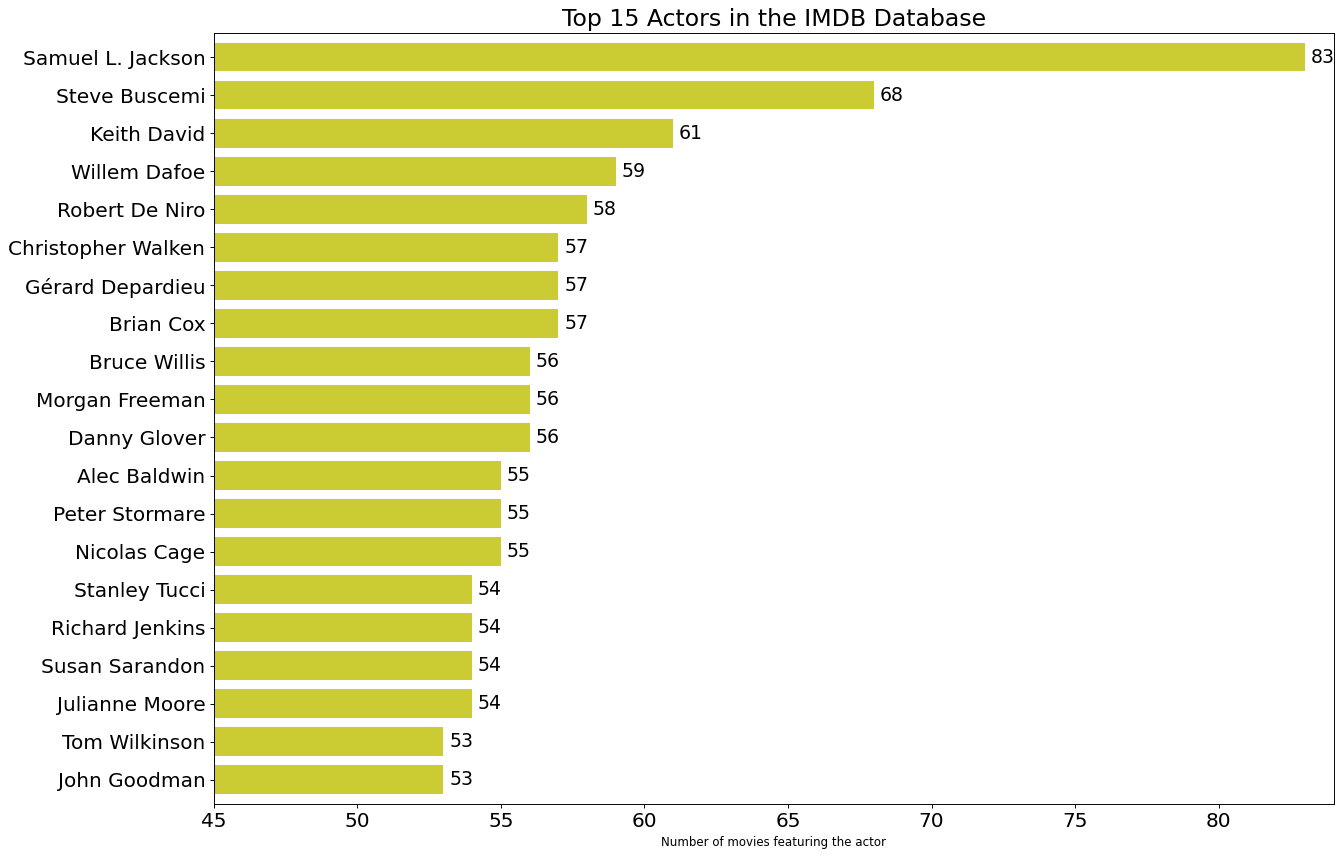

In [38]:
movies_actor = pd.DataFrame(imdb_data[['movieId', 'title_cast']],
                            columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and
# create a list containing the title_cast allocated to each movie
movies_actor = movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))

# Create expanded dataframe where
# each movie-tite_cast combination is in a seperate row
movies_actor = pd.DataFrame([(tup.movieId, d)
                             for tup
                             in movies_actor.itertuples()
                             for d in tup.title_cast],
                            columns=['movieId', 'title_cast'])

movies_actor = movies_actor.groupby(['title_cast'])[
    'movieId'].count().reset_index(name='Number of Movies')
movies_actor = movies_actor.sort_values(by='Number of Movies', ascending=False)

# Sececting the Top 20 actors in movies
movies_actor = movies_actor .head(20)
movies_actor = movies_actor.sort_values(by='Number of Movies', ascending=True)
# Plot popular actors
y_labels = movies_actor['title_cast']
plt.figure(figsize=(17, 12), dpi=85)
ax = movies_actor['Number of Movies'].plot(kind='barh', color='y', fontsize=17,
                                           xlim=[45, 84], width=.75, alpha=0.8)

ax.set_title('Top 15 Actors in the IMDB Database', fontsize=20)
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{}".format(x_value)
    plt.annotate(label, (x_value, y_value), xytext=(space, 0), fontsize=16,
                 textcoords="offset points", va='center', ha=ha)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Picking up from where the EDA left off we will now clean the data based on what has been Identified above



MODIFY AS REQUIRED!

test,
tags,
movies,
links,
imdb_data,
genome,
genome_scores,

# Movies_copy

formatting the movies dataframe into the desired format before merging with the rest of the training dataframe

In [39]:
# Removing leading and trailing spaces
cols = movies.select_dtypes(['object']).columns
movies[cols] = movies[cols].apply(lambda x: x.str.strip())
# spliting words into lists for one hot encoding
movies.genres = movies['genres'].str.lower().str.split('|')

In [40]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]"
1,2,Jumanji (1995),"[adventure, children, fantasy]"
2,3,Grumpier Old Men (1995),"[comedy, romance]"
3,4,Waiting to Exhale (1995),"[comedy, drama, romance]"
4,5,Father of the Bride Part II (1995),[comedy]


In [41]:
# We can remove the title column
movies.drop(columns=['title'], inplace=True)

In [44]:
# One hot encoding list values

mlb = MultiLabelBinarizer()
movies = movies.join(pd.DataFrame(mlb.fit_transform(movies.pop('genres')),
                                  columns=mlb.classes_,
                                  index=movies.index))

In [45]:
movies.head(10)

,movieId,(no genres listed),action,adventure,animation,children,comedy,crime,documentary,drama,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# IMDB data

this dataframe can help us shead light into the specifics of the movies in question and develop a better model

In [46]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


We can see from the above that there are two columns title_cast and plot_keywords that need to be formatted similarly to the dataframe above

In [48]:
# Removing leading and trailing spaces and splitting the object columns
cols = imdb_data.select_dtypes(['object']).columns
imdb_data[cols] = imdb_data[cols].apply(lambda x: x.str.strip())
# spliting words into lists for one hot encoding
imdb_data[cols] = imdb_data[cols].apply(lambda x: x.str.lower().str.split('|'))

In [49]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[tom hanks, tim allen, don rickles, jim varney...",[john lasseter],81.0,"[$30,000,000]","[toy, rivalry, cowboy, cgi animation]"
1,2,"[robin williams, jonathan hyde, kirsten dunst,...",[jonathan hensleigh],104.0,"[$65,000,000]","[board game, adventurer, fight, game]"
2,3,"[walter matthau, jack lemmon, sophia loren, an...",[mark steven johnson],101.0,"[$25,000,000]","[boat, lake, neighbor, rivalry]"
3,4,"[whitney houston, angela bassett, loretta devi...",[terry mcmillan],124.0,"[$16,000,000]","[black american, husband wife relationship, be..."
4,5,"[steve martin, diane keaton, martin short, kim...",[albert hackett],106.0,"[$30,000,000]","[fatherhood, doberman, dog, mansion]"


In [50]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


This dataframe contains useful data the missing data and the complexity that is ascociated with formating the other columns makes it very difficult to use.Thus it is not useful in the final dataframe that will go to modelling

# Looking at the original df made during data visulaization

In [51]:
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[['tomhanks','timallen','donrickles']]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[['robinwilliams','jonathanhyde','kirstendunst']]",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[['waltermatthau','jacklemmon','sophialoren']]",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[['whitneyhouston','angelabassett','lorettadev...",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[['stevemartin','dianekeaton','martinshort']]",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


Attempting to merge df and movies failed dismally in the way that movies was with the geanres onehot encoded

In [52]:
df = pd.merge(train, movies, on='movieId')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   movieId             int64  
 2   rating              float64
 3   timestamp           int64  
 4   title               object 
 5   genres              object 
 6   (no genres listed)  int32  
 7   action              int32  
 8   adventure           int32  
 9   animation           int32  
 10  children            int32  
 11  comedy              int32  
 12  crime               int32  
 13  documentary         int32  
 14  drama               int32  
 15  fantasy             int32  
 16  film-noir           int32  
 17  horror              int32  
 18  imax                int32  
 19  musical             int32  
 20  mystery             int32  
 21  romance             int32  
 22  sci-fi              int32  
 23  thriller            int32  
 24  war                 in

when running the above also leads to a memory error so it has also been omitted form our final data prosessing thus in this data engineering the only logical process to follow is to scale everything down and by that we mean removing features and not adding them to the notebook thus to keep this process as simple as possible we will use only the 'userId','movieId','rating' which are the bare minimum features needed to make this machine learning work

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic